<a href="https://colab.research.google.com/github/Dodaz/AH2179_HT24/blob/main/Algot_Sjoholm_Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load and prepare the data

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BusData.csv'
df = pd.read_csv(url)

# df = pd.read_csv('Exercise2BusData.csv')
df.head(10)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:03,10033,41355,1,-23,0,39,-4,28.641509
1,01/05/2022 07:21,10033,41356,1,168,0,39,181,27.880597
2,01/05/2022 07:37,10033,44400,1,231,0,39,244,27.852941
3,01/05/2022 07:50,10033,44399,1,150,17,39,143,27.826087
4,01/05/2022 19:29,10033,44060,1,965,35,51,947,42.029412
5,01/05/2022 19:58,10033,41351,1,33,19,46,30,38.970588
6,01/05/2022 20:14,10033,44399,1,75,26,46,63,38.840580
7,01/05/2022 20:28,10033,41356,1,58,15,46,52,34.059701
8,01/05/2022 20:57,10033,44060,1,904,35,46,888,34.102941
9,01/05/2022 21:00,10033,41357,1,141,12,46,140,34.000000


How many rows and columns does the dataset contain?

In [2]:
df.shape

(2179, 9)

Are any of the columns missing values?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2179 entries, 0 to 2178
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           2179 non-null   object 
 1   Stop_id                2179 non-null   int64  
 2   Bus_id                 2179 non-null   int64  
 3   Line_id                2179 non-null   int64  
 4   Arrival_delay          2179 non-null   int64  
 5   Dwell_time             2179 non-null   int64  
 6   Scheduled_travel_time  2179 non-null   int64  
 7   Upstream_stop_delay    2179 non-null   int64  
 8   Recurrent_delay        2179 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 153.3+ KB


For simplicity, use sample of 1000

In [4]:
#df = df.iloc[:1000]
df = df.sample(1000)

Remove columns that are no longer needed.

In [5]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

Draw a histogram by using seaborn to show the distribution of arrival delay.

<Axes: xlabel='Arrival_delay', ylabel='Count'>

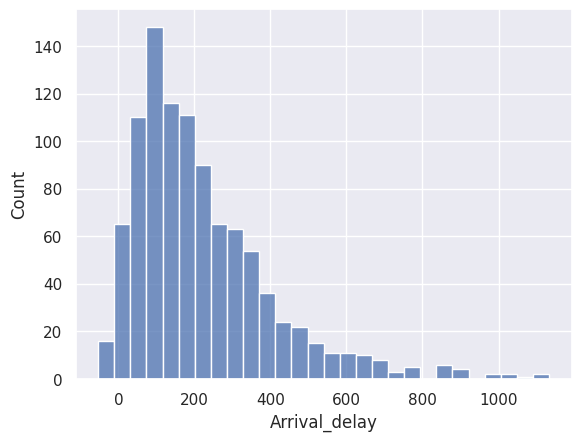

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.histplot(x=df['Arrival_delay'])

Find out how much influence input variables such as "Upstream_stop_delay" and "Dwell_time" have on the values in the "Arrival_delay" column.

In [7]:
corr_matrix = df.corr()
corr_matrix['Arrival_delay'].sort_values(ascending=False)

,Arrival_delay
Arrival_delay,1.000000
Upstream_stop_delay,0.993919
Dwell_time,0.251283
Recurrent_delay,0.205925
Scheduled_travel_time,0.141963


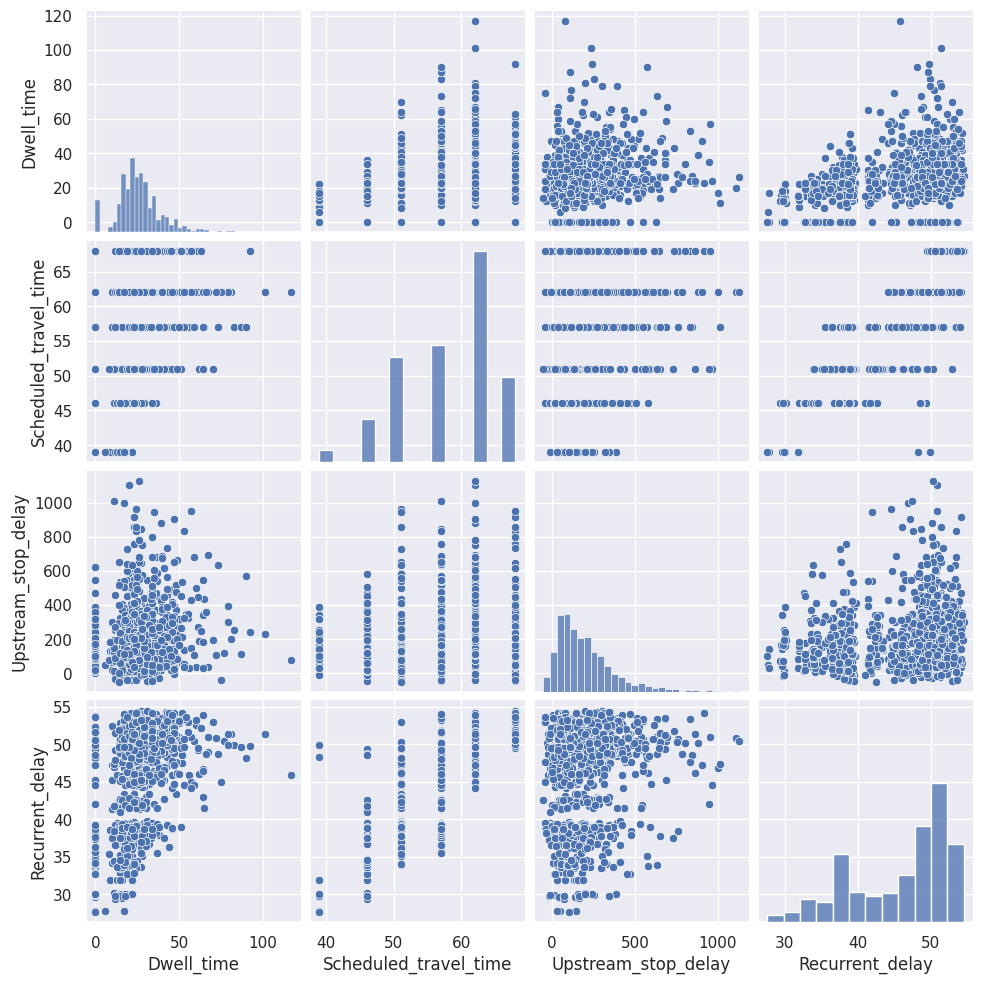

In [8]:
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

sns.pairplot(x)

## Train / Test Split

Before modeling we need to split our data into a training and test set. The training set is used to train the model and the test set to evaluate its performance.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Create a linear regression model
Now it's time build a regression model and train it with the data prepared in the previous exercise.

In [10]:
from xgboost import XGBRegressor

# Create a Regression model
model = XGBRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the test data with the fitted model
y_pred = model.predict(X_test)

## Evaluate the model
You can evaluate the model's performance using various metrics, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared (R2).

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 13.274203463494779
Mean Squared Error: 496.5729455795417
R-squared: 0.9876388787499828


## Visualize the Results
we create a "Actual vs. Predicted Values" graph to give a visual inspection of the prediction quality.

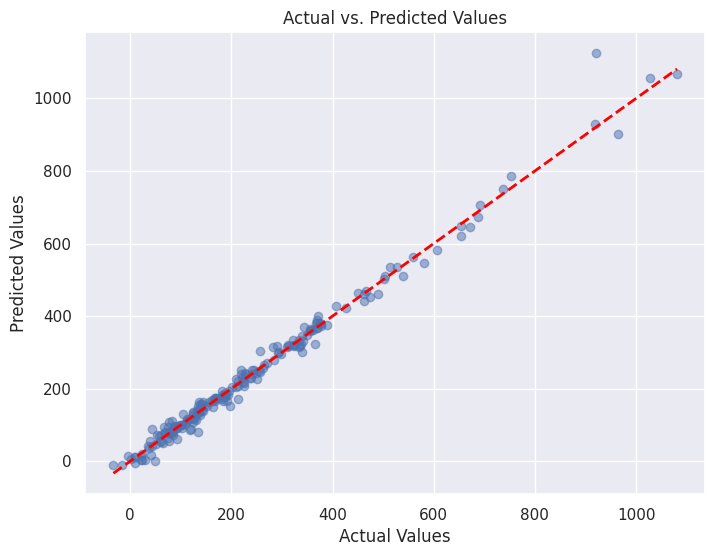

In [13]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

## Normalization


In [14]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Grid search


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Define a parameter grid for hyperparameter tuning
param_grid = {
    "max_depth": [1, 2, 3],
    "eta": [0.01, 0.05, 0.1, 0.3],
    "subsample": [0.2, 0.5, 0.8, 1.0],
    "colsample_bytree": [0.5, 0.8, 1.0],
    "objective": ["reg:squarederror"],#, "squaredlogerror", "reg:logistic", "reg:pseudohubererror"],
}

# Initialize XGBoost regressor
xgb_reg = XGBRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=2, n_jobs=5, verbose=True)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 2 folds for each of 144 candidates, totalling 288 fits
Best Parameters: {'colsample_bytree': 1.0, 'eta': 0.1, 'max_depth': 3, 'objective': 'reg:squarederror', 'subsample': 0.5}
Best Score: 0.9871748034535524


## Train a xgboost regression model
Now, create an xgboost regression model using the best parameters and train it using the training data.

In [16]:
# Create a model using the best parameters
best_xgb_model = XGBRegressor(**best_params)

# Train the model on the full training dataset
best_xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

## Make predictions
Use the trained model to make predictions on the test data and evaluate the performance of the SVM regression model using metrics like Mean Squared Error (MSE) and R-squared.

In [17]:
y_pred = best_xgb_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 11.4930776232481
Mean Squared Error: 318.0326225008514
R-squared: 0.9920832581734675


## Let's see the predictions
we create a "Actual vs. Predicted Values" graph again to give a visual inspection of the prediction quality.

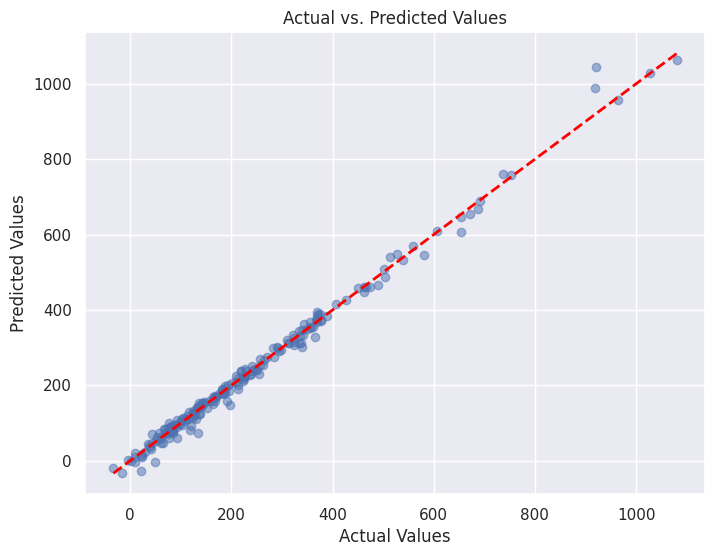

In [18]:
# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()